In [224]:
import japanize_matplotlib as ja
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

ja.japanize()

In [219]:
def remove_commas(x):
    if (type(x) is str):
        x = x.replace(',', '')
    x = float(x)
    return x

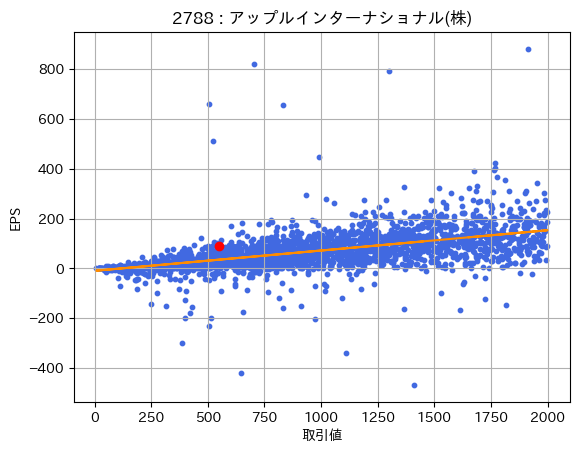

標準価格 1217 円 - 現在価格 548 円 = 伸びしろ 669 円


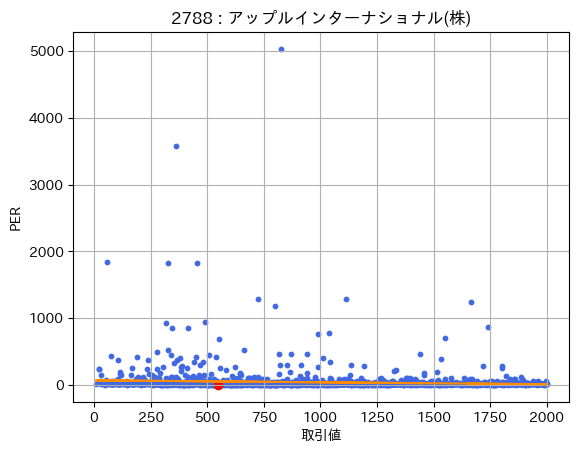

標準価格 2175 円 - 現在価格 548 円 = 伸びしろ 1627 円


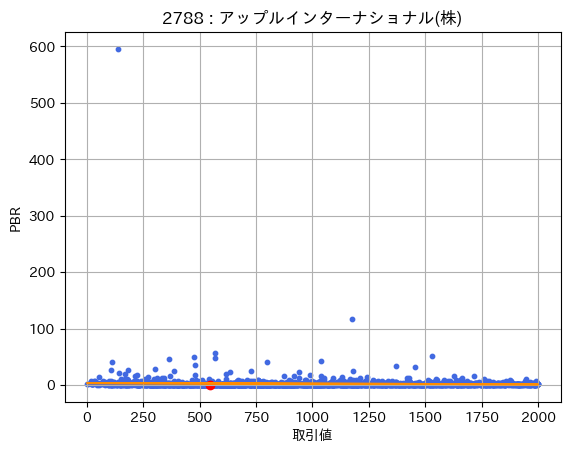

標準価格 2430 円 - 現在価格 548 円 = 伸びしろ 1882 円
各要素の標準価格より: 平均価格=[1940 円], 中央価格=[2175 円]


In [229]:
def analyze_stock(code, y_axis, filepath):
    X_AXIS = "取引値"
    COL_COMPANY = "名称・コード・市場"
    MAX_PRICE = 2000
    df_entire = pd.read_csv(filepath, index_col=0)
    columns = [X_AXIS, y_axis]
    df = df_entire[columns]
    df = df.dropna(subset=columns)
    df = df[columns].applymap(remove_commas)
    df = df[(df[X_AXIS] < MAX_PRICE)]

    x_all = df[[X_AXIS]]
    y_all = df[[y_axis]]
    
    df_one = df.loc[code]
    x_one = df_one[[X_AXIS]]
    y_one = df_one[[y_axis]]
    
    # 散布図(全体)
    x_allnum = x_all.to_numpy()
    y_allnum = y_all.to_numpy()
    plt.scatter(x_allnum, y_allnum, color='royalblue', s=10)

    # 回帰直線
    model = LinearRegression()
    model.fit(x_all, y_all)
    y_regression = model.predict(x_all)
    plt.plot(x_allnum, y_regression, color='darkorange')
    
    # 散布図(標的)
    x_onenum = x_one.to_numpy()
    y_onenum = y_one.to_numpy()
    plt.scatter(x_onenum, y_onenum, color='red')

    title = "%d : %s" % (code, df_entire.loc[code][COL_COMPANY])
    plt.title(title)
    plt.xlabel(X_AXIS)
    plt.ylabel(y_axis)
    plt.grid()
    plt.show()

    # 回帰線上から標準株価を取得
    standard_y = df_one[y_axis]
    standard_price = int(((standard_y - model.intercept_) / model.coef_)[0])
    current_price = df_one[X_AXIS]
    standard_stat = "標準価格 %d 円 - 現在価格 %d 円 = 伸びしろ %d 円" % (standard_price, current_price, (standard_price - current_price))
    print(standard_stat)
                                                         
    return standard_price

FILEPATH = '【株式分析】②株式銘柄スクリーニング - ★分析★.csv'
standard_prices = []

code = 2788
y_axia = 'EPS'
standard_prices += [analyze_stock(code, y_axia, FILEPATH)]
y_axia = 'PER'
standard_prices += [analyze_stock(code, y_axia, FILEPATH)]
y_axia = 'PBR'
standard_prices += [analyze_stock(code, y_axia, FILEPATH)]


standard_prices = np.array(standard_prices)
print("各要素の標準価格より: 平均価格=[%d 円], 中央価格=[%d 円]" % (np.average(standard_prices), np.median(standard_prices)))